In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as P
from scipy.stats import skew

In [274]:
file_path = 'C:\\Users\\STEFANOS\\Desktop\\realtor-data.csv'

In [275]:
#Reading the csv file
df = pd.read_csv(file_path,parse_dates=['sold_date'])

In [276]:
df.head(10)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaT
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaT
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaT
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaT
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaT
5,for_sale,179000.0,4.0,3.0,0.46,"Bo Calabazas San Sebastian, San Sebastian, PR,...",Bo Calabazas San Sebastian,San Sebastian,Puerto Rico,612.0,2520.0,NaT
6,for_sale,50000.0,3.0,1.0,0.20,"49.1 140, Ciales, PR, 00639",49.1 140,Ciales,Puerto Rico,639.0,2040.0,NaT
7,for_sale,71600.0,3.0,2.0,0.08,"3467 St, Ponce, PR, 00731",3467 St,Ponce,Puerto Rico,731.0,1050.0,NaT
8,for_sale,100000.0,2.0,1.0,0.09,"230 Rio De Vida, Ponce, PR, 00730",230 Rio De Vida,Ponce,Puerto Rico,730.0,1092.0,NaT
9,for_sale,300000.0,5.0,3.0,7.46,"Pr 120 Bo Maravilla Sur K M # 335, Las Marias,...",Pr 120 Bo Maravilla Sur K M # 335,Las Marias,Puerto Rico,670.0,5403.0,NaT


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   status        733159 non-null  object        
 1   price         733088 non-null  float64       
 2   bed           617177 non-null  float64       
 3   bath          621407 non-null  float64       
 4   acre_lot      572378 non-null  float64       
 5   full_address  733159 non-null  object        
 6   street        732069 non-null  object        
 7   city          733087 non-null  object        
 8   state         733159 non-null  object        
 9   zip_code      732957 non-null  float64       
 10  house_size    520772 non-null  float64       
 11  sold_date     347237 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 67.1+ MB


### Checking for duplicated rows

In [278]:
duplicate_rows = df.duplicated()
df.duplicated().sum()

628490

In [120]:
df.loc[duplicate_rows==True].head(100)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
135,for_sale,105000.0,3.0,2.0,0.08,"DD18 Calle 28, Ponce, PR, 00728",DD18 Calle 28,Ponce,Puerto Rico,728.0,1500.0,NaT
139,for_sale,300000.0,5.0,3.0,7.46,"Pr 120 Bo Maravilla Sur K M # 335, Las Marias,...",Pr 120 Bo Maravilla Sur K M # 335,Las Marias,Puerto Rico,670.0,5403.0,NaT
140,for_sale,155000.0,3.0,2.0,0.10,"Pr, Lares, PR, 00669",Pr,Lares,Puerto Rico,669.0,4161.0,NaT
148,for_sale,122500.0,3.0,2.0,0.05,"16 Muoz Rivera St, Yauco, PR, 00698",16 Muoz Rivera St,Yauco,Puerto Rico,698.0,1118.0,NaT
149,for_sale,575000.0,3.0,2.0,3.88,"5.8 Carr 435 Km # 58, San Sebastian, PR, 00685",5.8 Carr 435 Km # 58,San Sebastian,Puerto Rico,685.0,4000.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
385,for_sale,250000.0,4.0,2.0,0.08,"36 Calle Betances, Cabo Rojo, PR, 00623",36 Calle Betances,Cabo Rojo,Puerto Rico,623.0,3052.0,NaT
386,for_sale,150000.0,3.0,1.0,0.07,"2 San German, San German, PR, 00683",2 San German,San German,Puerto Rico,683.0,363.0,NaT
387,for_sale,750000.0,12.0,6.0,0.52,"Calle 4, Cabo Rojo, PR, 00623",Calle 4,Cabo Rojo,Puerto Rico,623.0,4800.0,NaT
388,for_sale,395000.0,3.0,2.0,0.25,"307 Lomas De La Bahia, Cabo Rojo, PR, 00623",307 Lomas De La Bahia,Cabo Rojo,Puerto Rico,623.0,2800.0,NaT


### Keeping the first row (dropping duplicates)

In [279]:
df=df.drop_duplicates()

### Total rows after dropping duplicates

In [280]:
df.shape

(104669, 12)

### Check the distribution for price and house size per state

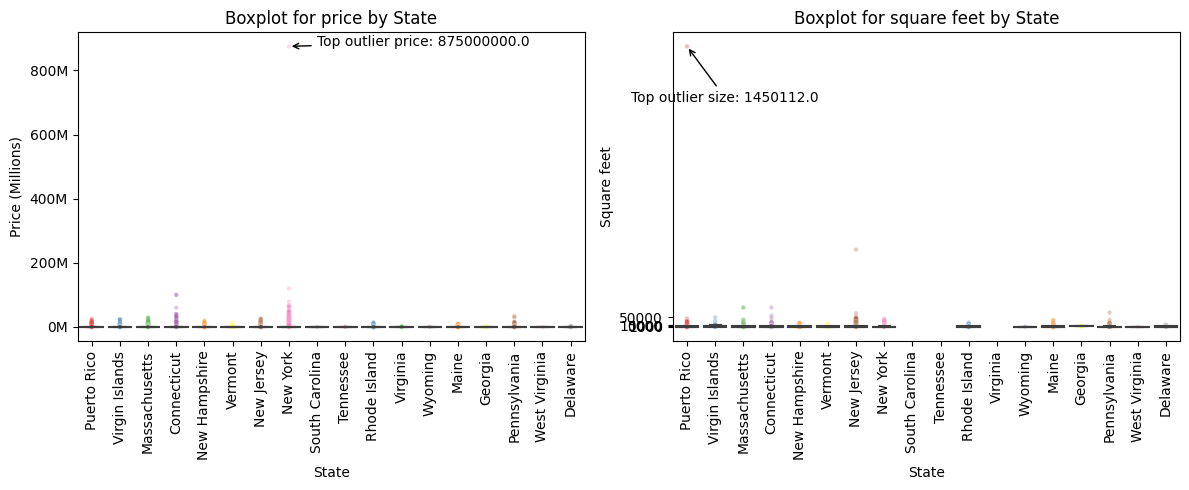

In [290]:
states = df['state'].unique()
#data
data1 = [df[df['state'] == state]['price'].values/1_000_000 for state in states]
data2 = [df[df['state'] == state]['house_size'].values for state in states]
max_value_price = df['price'].max()
max_value_house_size = df['house_size'].max()
#visualizing
state_color_mapping = {state: sns.color_palette('Set1', len(states))[i] for i, state in enumerate(states)}
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 5))

#Boxplot for price 
sns.boxplot(data=data1, showfliers=False, palette=state_color_mapping.values(),ax=ax1)
sns.scatterplot(x='state', y='price', data=df, hue='state', palette=state_color_mapping, s=10, alpha=0.3,legend=False,ax=ax1)
ax1.annotate(f'Top outlier price: {max_value_price}', [df[df['price'] == max_value_price]['state'], max_value_price], xytext=(20, 0), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
ax1.set_xticks(range(0, len(states)),states,rotation='vertical')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}M".format(x / 1e6)))
ax1.set_xlabel("State")
ax1.set_ylabel("Price (Millions)")
ax1.set_title("Boxplot for price by State")

#Boxplot for house_sizes
sns.boxplot(data=data2, showfliers=False, palette=state_color_mapping.values(),ax=ax2)
sns.scatterplot(x='state', y='house_size', data=df, hue='state', palette=state_color_mapping.values(), s=10, alpha=0.3,legend=False,ax=ax2)

ax2.set_xticks(range(0, len(states)),states,rotation='vertical')
ax2.annotate(f'Top outlier size: {max_value_house_size}', [df[df['house_size'] == max_value_house_size]['state'], max_value_house_size], xytext=(-40, -40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
ax2.set_yticks([1000, 5000, 10000,50000])
ax2.set_xlabel("State")
ax2.set_ylabel("Square feet")
ax2.set_title("Boxplot for square feet by State")

plt.tight_layout()

plt.show()

In [124]:
df.state.value_counts()

state
New Jersey        32295
New York          20085
Connecticut       13732
Massachusetts     10193
Pennsylvania       9065
Maine              5061
New Hampshire      3561
Rhode Island       3419
Puerto Rico        2664
Vermont            2530
Delaware           1298
Virgin Islands      750
Virginia              7
Georgia               5
Wyoming               1
South Carolina        1
West Virginia         1
Tennessee             1
Name: count, dtype: int64

### Exclude states with no more than 1000 records in total 

In [291]:
records_per_state=df['state'].value_counts()
df = df[df['state'].isin(records_per_state[records_per_state > 1000].index)]
df['state'].value_counts()

state
New Jersey       32295
New York         20085
Connecticut      13732
Massachusetts    10193
Pennsylvania      9065
Maine             5061
New Hampshire     3561
Rhode Island      3419
Puerto Rico       2664
Vermont           2530
Delaware          1298
Name: count, dtype: int64

### Filter outliers for price,house size,acre_lot

In [300]:
filtered_df=df.copy()

In [301]:
#Limiting price,beds and house size values to remove outliers
whisker_state = filtered_df.groupby('state').apply(lambda x: 
pd.Series({'price_upper_whisker': x['price'].quantile(0.75) + 1.5* (x['price'].quantile(0.75) - x['price'].quantile(0.25)),
'price_lower_whisker': x['price'].quantile(0.01),          
'house_size_upper_whisker': x['house_size'].quantile(0.75) + 1.5 * (x['house_size'].quantile(0.75) - x['house_size'].quantile(0.25)),
'acre_lot_upper_whisker': x['acre_lot'].quantile(0.75) + 1.5 * (x['acre_lot'].quantile(0.75) - x['acre_lot'].quantile(0.25))}))

# Merge the upper whisker values back to the original DataFrame
filtered_df = filtered_df.merge(whisker_state,on='state')

# Filter rows where "price" is less than or equal to the corresponding "price_upper_whisker" value
# and "house size" is less than or equal to the corresponding "house_size_upper_whisker" value
filtered_df = filtered_df[(filtered_df['price'] <= filtered_df['price_upper_whisker']) & (filtered_df['price'] >= filtered_df['price_lower_whisker']) 
& (filtered_df['house_size'] <= filtered_df['house_size_upper_whisker']) & (filtered_df['acre_lot'] <= filtered_df['acre_lot_upper_whisker'])]

In [302]:
filtered_df.shape

(42824, 16)

### Nulls in the filtered df (without the outliers)

#### Per column

In [295]:
filtered_df.isna().sum()

status                          0
price                           0
bed                           789
bath                         1158
acre_lot                        0
full_address                    0
street                         91
city                            2
state                           0
zip_code                        8
house_size                      0
sold_date                   16124
price_upper_whisker             0
price_lower_whisker             0
house_size_upper_whisker        0
acre_lot_upper_whisker          0
dtype: int64

#### In total

In [296]:
filtered_df.isnull().any(axis=1).sum()

16954

#### Drop unimportant for the EDA and the prediction columns

In [303]:
filtered_df=filtered_df.drop(columns=['price_upper_whisker','price_lower_whisker','house_size_upper_whisker','status','street','city','zip_code','sold_date','acre_lot_upper_whisker'],axis=1)

In [304]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42824 entries, 0 to 103902
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         42824 non-null  float64
 1   bed           42035 non-null  float64
 2   bath          41666 non-null  float64
 3   acre_lot      42824 non-null  float64
 4   full_address  42824 non-null  object 
 5   state         42824 non-null  object 
 6   house_size    42824 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.6+ MB


In [305]:
#New number of nulls after dropping the columns
filtered_df.isnull().any(axis=1).sum()

1437

In [306]:
filtered_df.isna().sum()

price              0
bed              789
bath            1158
acre_lot           0
full_address       0
state              0
house_size         0
dtype: int64

### Median imputation for bedrooms and bathrooms

#### Check the distribution of the house size for each state and distribution of the price for each state

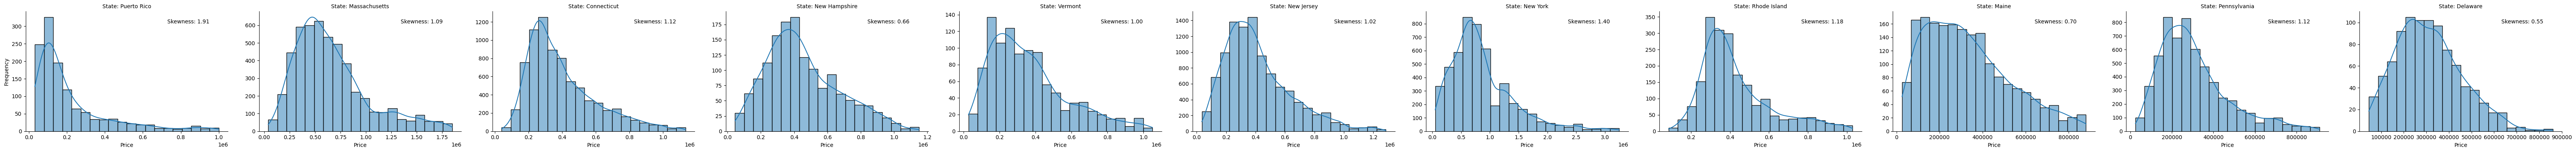

In [307]:
g = sns.FacetGrid(filtered_df, col='state', height=4, aspect=1.5,sharey=False,sharex=False)
g.map_dataframe(sns.histplot, x='price', bins=20, kde=True)
g.set_axis_labels('Price', 'Frequency')
g.set_titles('State: {col_name}')
for ax, state in zip(g.axes.flat, df['state'].unique()):
    skewness = filtered_df[filtered_df['state'] == state]['price'].skew()
    ax.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=ax.transAxes, fontsize=10)
plt.show()

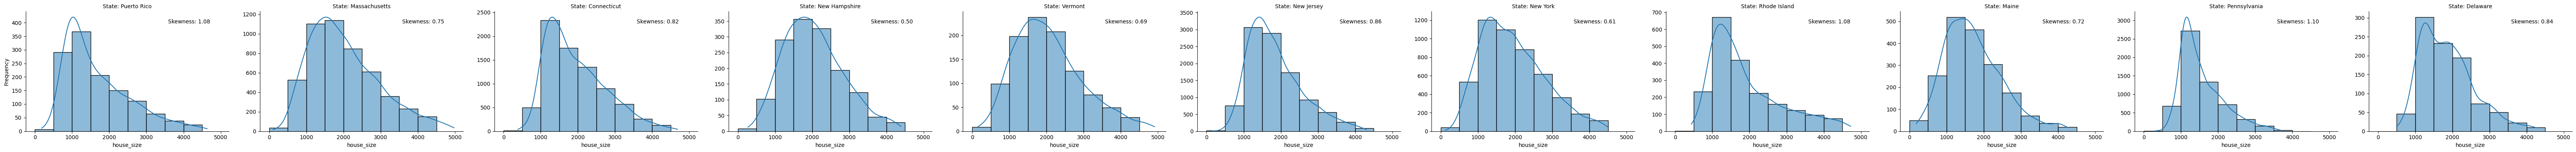

In [308]:
g = sns.FacetGrid(filtered_df, col='state', height=4, aspect=1.5,sharey=False)
g.map_dataframe(sns.histplot, x='house_size', bins=range(0, 5000, 500), kde=True)
g.set_axis_labels('house_size', 'Frequency')
g.set_titles('State: {col_name}')
for ax, state in zip(g.axes.flat, df['state'].unique()):
    skewness = filtered_df[filtered_df['state'] == state]['house_size'].skew()
    ax.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=ax.transAxes, fontsize=10)
plt.show()

In [309]:
price_bins = [0, 200000, 400000,600000,800000, np.inf]
price_labels = ['<200K', '<400K', '<600K','<800K','>800K']
house_size_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, np.inf]
house_size_labels = ['<500', '<1000', '<1500', '<2000', '<2500', '<3000', '>3000']

filtered_df['price_category'] = pd.cut(filtered_df['price'], bins=price_bins, labels=price_labels)
filtered_df['house_size_category'] = pd.cut(filtered_df['house_size'], bins=house_size_bins, labels=house_size_labels)

In [310]:
filtered_df[['price','price_category','house_size','house_size_category']]

,price,price_category,house_size,house_size_category
0,105000.0,<200K,920.0,<1000
1,80000.0,<200K,1527.0,<2000
2,67000.0,<200K,748.0,<1000
3,145000.0,<200K,1800.0,<2000
5,179000.0,<200K,2520.0,<3000
...,...,...,...,...
103894,229900.0,<400K,1428.0,<1500
103896,349000.0,<400K,1606.0,<2000
103897,364900.0,<400K,1750.0,<2000
103899,465500.0,<600K,2269.0,<2500


In [311]:
filtered_df['bed'] =filtered_df.groupby(['state','price_category','house_size_category'])['bed'].transform(lambda x: x.fillna(x.median()))

In [312]:
filtered_df['bath'] =filtered_df.groupby(['state','price_category','house_size_category'])['bath'].transform(lambda x: x.fillna(x.median()))

In [313]:
filtered_df.isna().sum()

price                  0
bed                    6
bath                   1
acre_lot               0
full_address           0
state                  0
house_size             0
price_category         0
house_size_category    0
dtype: int64

In [314]:
filtered_df = filtered_df.dropna()

In [315]:
filtered_df=filtered_df.reset_index()
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42817 entries, 0 to 42816
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   index                42817 non-null  int64   
 1   price                42817 non-null  float64 
 2   bed                  42817 non-null  float64 
 3   bath                 42817 non-null  float64 
 4   acre_lot             42817 non-null  float64 
 5   full_address         42817 non-null  object  
 6   state                42817 non-null  object  
 7   house_size           42817 non-null  float64 
 8   price_category       42817 non-null  category
 9   house_size_category  42817 non-null  category
dtypes: category(2), float64(5), int64(1), object(2)
memory usage: 2.7+ MB


In [316]:
filtered_df.isna().sum()

index                  0
price                  0
bed                    0
bath                   0
acre_lot               0
full_address           0
state                  0
house_size             0
price_category         0
house_size_category    0
dtype: int64

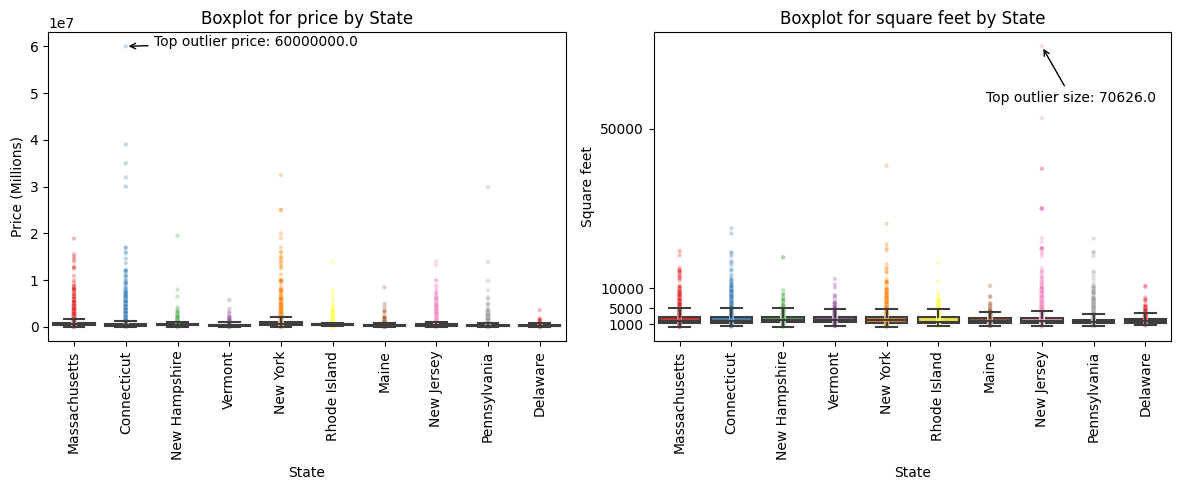

In [17]:
states = df['state'].unique()
#data
data1 = [df[df['state'] == state]['price'].values for state in states]
data2 = [df[df['state'] == state]['house_size'].values for state in states]
max_value_price = df['price'].max()
max_value_house_size = df['house_size'].max()

#visualizing
state_color_mapping = {state: sns.color_palette('Set1', len(states))[i] for i, state in enumerate(states)}
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 5))

#Boxplot for price 
sns.boxplot(data=data1, showfliers=False, palette=state_color_mapping.values(),ax=ax1)
sns.scatterplot(x='state', y='price', data=df, hue='state', palette=state_color_mapping, s=10, alpha=0.3,legend=False,ax=ax1)
ax1.annotate(f'Top outlier price: {max_value_price}', [df[df['price'] == max_value_price]['state'], max_value_price], xytext=(20, 0), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
ax1.set_xticks(range(0, len(states)),states,rotation='vertical')
ax1.set_xlabel("State")
ax1.set_ylabel("Price (Millions)")
ax1.set_title("Boxplot for price by State")

#Boxplot for house_sizes
sns.boxplot(data=data2, showfliers=False, palette=state_color_mapping.values(),ax=ax2)
sns.scatterplot(x='state', y='house_size', data=df, hue='state', palette=state_color_mapping.values(), s=10, alpha=0.3,legend=False,ax=ax2)

ax2.set_xticks(range(0, len(states)),states,rotation='vertical')
ax2.annotate(f'Top outlier size: {max_value_house_size}', [df[df['house_size'] == max_value_house_size]['state'], max_value_house_size], xytext=(-40, -40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
ax2.set_yticks([1000, 5000, 10000,50000])
ax2.set_xlabel("State")
ax2.set_ylabel("Square feet")
ax2.set_title("Boxplot for square feet by State")

plt.tight_layout()

plt.show()

#### Absolute difference on medians before and after filtering

In [192]:
#Median difference before and after filtering
median= df.groupby('state')['price'].median().astype('int').reset_index(name='median')
mean= df.groupby('state')['price'].mean().astype('int').reset_index(name='mean')
median_filtered= filtered_df.groupby('state')['price'].median().astype('int').reset_index(name='filtered_median')
mean_filtered= filtered_df.groupby('state')['price'].mean().astype('int').reset_index(name='filtered_mean')
before_after=median_filtered.merge(median,on='state',how='inner').merge(mean,on='state',how='inner').merge(mean_filtered,on='state',how='inner')
before_after['Median_Difference']=(before_after['filtered_median']-before_after['median'])
before_after['Mean_Difference']=(before_after['filtered_mean']-before_after['mean'])
before_after[['state','median','filtered_median','Median_Difference','mean','filtered_mean','Mean_Difference']]

,state,median,filtered_median,Median_Difference,mean,filtered_mean,Mean_Difference
0,Connecticut,339900,345000,5100,659816,398511,-261305
1,Delaware,315000,299900,-15100,372420,310937,-61483
2,Maine,175000,297000,122000,334036,329154,-4882
3,Massachusetts,589900,585000,-4900,974981,661136,-313845
4,New Hampshire,349000,413450,64450,483136,452445,-30691
5,New Jersey,425000,368945,-56055,623687,413259,-210428
6,New York,795000,739000,-56000,1698986,865504,-833482
7,Pennsylvania,299900,270000,-29900,449399,306031,-143368
8,Puerto Rico,169450,139500,-29950,674567,221303,-453264
9,Rhode Island,399000,379000,-20000,572108,429000,-143108


### Correlation heatmap between price and main features

In [193]:
corr_data=filtered_df[['price','house_size','bed','bath']]

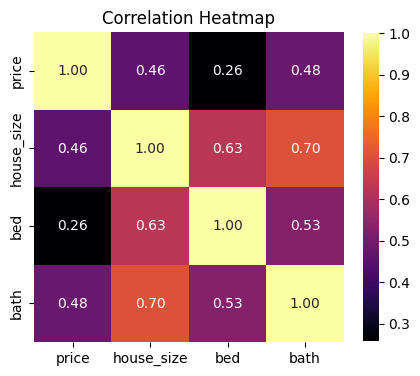

In [194]:
plt.figure(figsize=(5, 5)) 
sns.heatmap(
    corr_data.corr(),
    annot=True, 
    fmt=".2f",  
    cmap='inferno',  
    square=True, 
    cbar_kws={"shrink": 0.8} 
)

plt.title("Correlation Heatmap")

plt.show()

### Heatmap on the max and median price of the filtered_df

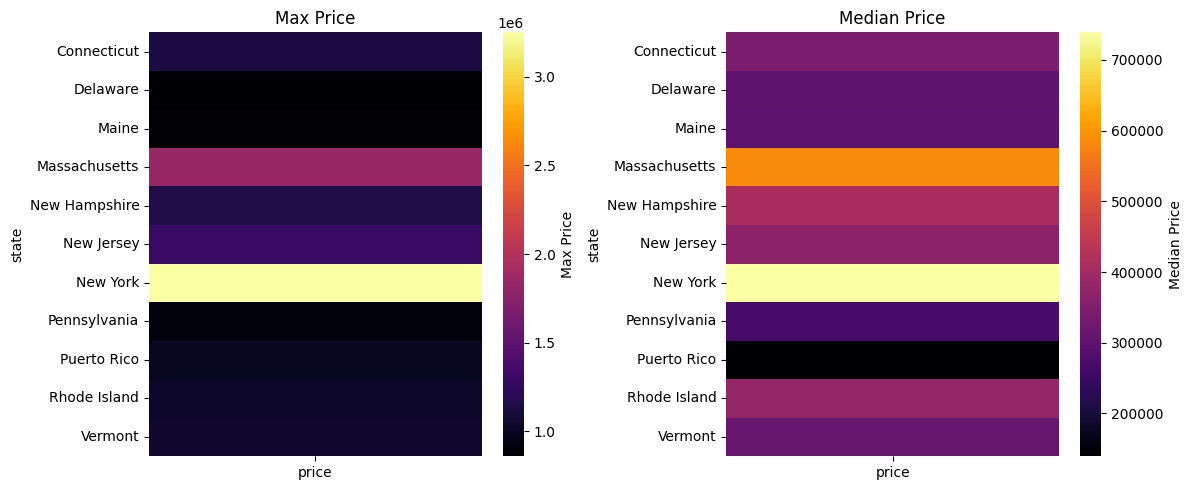

In [195]:
#Getting the data in pivoted form
pivot_data_max = filtered_df.pivot_table(index='state',values='price',aggfunc='max')
pivot_data_median=filtered_df.pivot_table(index='state',values='price',aggfunc='median')
#Heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(pivot_data_max, annot=False, cmap='inferno', cbar_kws={'label': 'Max Price'},ax=ax1)
sns.heatmap(pivot_data_median, annot=False, cmap='inferno', cbar_kws={'label': 'Median Price'},ax=ax2)
ax1.set_title('Max Price')
ax2.set_title('Median Price')
plt.tight_layout()
plt.show()

### Boxplots for price and house size (sq feet) for the filtered df

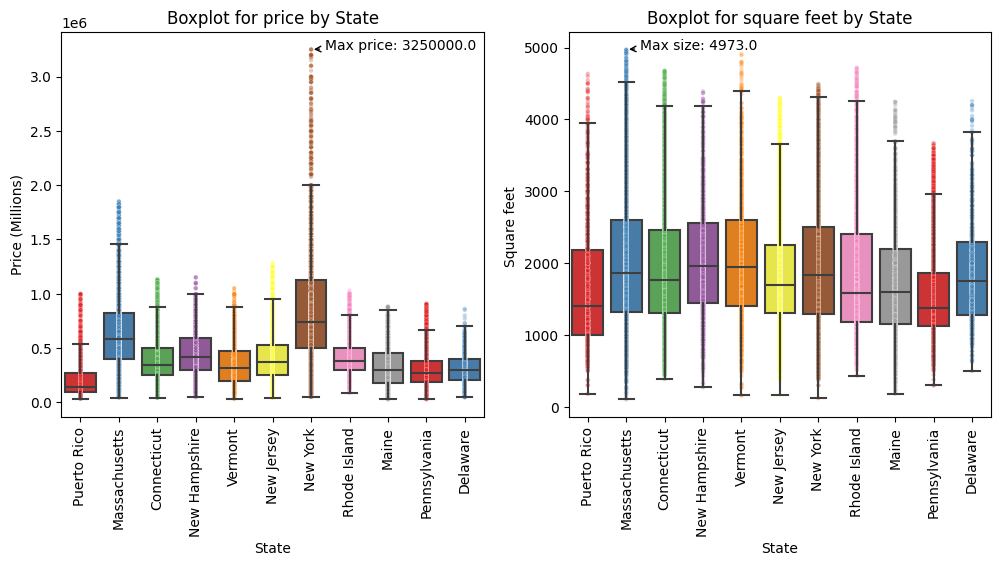

In [196]:
#Boxplot price for the filtered df

states = df['state'].unique()
data1 = [filtered_df[filtered_df['state'] == state]['price'].values for state in states]
data2 = [filtered_df[filtered_df['state'] == state]['house_size'].values for state in states]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5),sharex=True)
max_price=filtered_df['price'].max()
max_size=filtered_df['house_size'].max()
state_color_mapping = {state: sns.color_palette('Set1', len(states))[i] for i, state in enumerate(states)}
#Boxplot price
sns.boxplot(data=data1, showfliers=False, palette=state_color_mapping.values(), ax=ax1)
sns.scatterplot(x='state', y='price', data=filtered_df, hue='state', palette=state_color_mapping, s=10, alpha=0.3,legend=False, ax=ax1)
ax1.set_xlabel("State")
ax1.set_xticks(range(0, len(states)),states,rotation='vertical')
ax1.set_ylabel("Price (Millions)")
ax1.set_title("Boxplot for price by State")
ax1.annotate(f'Max price: {max_price}', [filtered_df[filtered_df['price'] == max_price]['state'].values[0], max_price], xytext=(10, 0), textcoords='offset points',arrowprops=dict(arrowstyle='->'))

#Boxplot house_size
sns.boxplot(data=data2, showfliers=False, palette=state_color_mapping.values(), ax=ax2)
sns.scatterplot(x='state', y='house_size', data=filtered_df, hue='state', palette=state_color_mapping, s=10, alpha=0.3,legend=False, ax=ax2)
ax2.set_xticks(range(0, len(states)),states,rotation='vertical')
ax2.set_xlabel("State")
ax2.set_ylabel("Square feet ")
ax2.set_title("Boxplot for square feet by State")
ax2.annotate(f'Max size: {max_size}', [filtered_df[filtered_df['house_size'] == max_size]['state'].values[0], max_size], xytext=(10, 0), textcoords='offset points',arrowprops=dict(arrowstyle='->'))

plt.show()

# Price prediction (Random forest)

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [200]:
features = ['state', 'bath','house_size','acre_lot','bed']
outcome = ['price']

In [201]:
X = filtered_df[features]
y = filtered_df[outcome]

In [202]:
y

,price
0,105000.0
1,80000.0
2,67000.0
3,145000.0
4,179000.0
...,...
42812,229900.0
42813,349000.0
42814,364900.0
42815,465500.0


In [203]:
X = pd.get_dummies(X, columns=['state'],  prefix='', prefix_sep='', drop_first=True)
X = X.astype(int)
X

,bath,house_size,acre_lot,bed,Delaware,Maine,Massachusetts,New Hampshire,New Jersey,New York,Pennsylvania,Puerto Rico,Rhode Island,Vermont
0,2,920,0,3,0,0,0,0,0,0,0,1,0,0
1,2,1527,0,4,0,0,0,0,0,0,0,1,0,0
2,1,748,0,2,0,0,0,0,0,0,0,1,0,0
3,2,1800,0,4,0,0,0,0,0,0,0,1,0,0
4,3,2520,0,4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42812,2,1428,0,3,1,0,0,0,0,0,0,0,0,0
42813,3,1606,0,3,1,0,0,0,0,0,0,0,0,0
42814,2,1750,0,3,1,0,0,0,0,0,0,0,0,0
42815,3,2269,0,4,1,0,0,0,0,0,0,0,0,0


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [260]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the training data
X_train= scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test= scaler.transform(X_test)

In [244]:
rf_model = RandomForestRegressor()


In [245]:
rf_model.fit(X_train, y_train.values.ravel())


RandomForestRegressor()

In [246]:
y_pred = rf_model.predict(X_test)

In [247]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)
print("RMSE:",rmse)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

RMSE: 256834.66310111206
Mean Squared Error (MSE): 65964044170.261734
R-squared (R2): 0.42710625211829367


#### Improve hyperparameters by cross validation

In [224]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error',n_jobs=-1)

grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [257]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=200,max_depth=10, min_samples_split=01,min_samples_leaf=2,n_jobs=-1,max_features = 'sqrt')

In [261]:
rf_model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=300, n_jobs=-1,
                      random_state=200)

In [262]:
y_pred = rf_model.predict(X_test)

In [263]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)
print("RMSE:",rmse)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

RMSE: 231786.83159552113
Mean Squared Error (MSE): 53725135301.09048
R-squared (R2): 0.5334004379924093
